 we can use urlretrieve from urllib.request to download data from a given url

In [201]:
from urllib.request import urlretrieve
medical_charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
file_name = "medical_charges.csv"
urlretrieve(medical_charges_url, file_name)     #urlretrieve(url,filename)

('medical_charges.csv', <http.client.HTTPMessage at 0x7e3d5f31fd10>)

the output is a tuple and has two parts has to parts -
1. the first value is local file name
2. the second value contains meta data about the file , when we use urlretrieve it not only downloads the data but also provides metadata about the request in form of  HTTPMessage object . This meta data contains information about -
    1. content type - format in which file is stored
    2. content length
    3. last modisied
    4. server info - details about web serve hosting the file
    4. encoding -  character encoding used in response


In [202]:
pip install pandas

pip stands for pip installs package , is the package manager for python  that allows us to install , update and manage python libraries from python package index (PyPI)

when we run pip install package -
1. pip will check if the package is present in PyPI and send request to install latest version of package

2.  choosing best package format (.whl vs .tar.gz)
     1. .whl  - .whl(wheel) is  a pre-built package format that makes the installation faster
     this file is aleady compiled so gets installed quickly
     2. .tar.gz - contains orignal source code and needs to be built hence taskes longer time in installation

if wheel file is available for the system pip downloads it if not available it downloads the source file (.tar.gz)

3. Downloading the package - once the package is selected pip downloads the package and stores it in a temporary location

4. Resolving dependencies- many packages depend on other packages to work eg pandas req numpy , so pip will check if dependecy is installed , if not it will install it first

5. installs the package -
    1. extracts the file
    2. copies them to site-packages directory (where python stores installed libraries)
    3. registers package so that it can be identified by python

6. Verification - can verify using pip list or import pandas as pd

In [203]:
import pandas as pd

In [204]:
medical_df = pd.read_csv('medical_charges.csv')

about pd.read_csv()-

pd.read_csv is used to read a CSV (comma seprated values) file and convert it into dataframe

syntax -
 pd.read_csv (filepath, sep=',', header=0, names=None, index_col=None, dtype=None, usecols=None, nrows=None, encoding=None)

 1. header - row number to use as col names , by default takes first row as names of col
 2. names = List of column names. If the file does not have headers, you can manually provide names.
 3. index_col = which col to be  used as index of the dataframe
 4. dtype = Defines data types of columns manually. Example: dtype={'Age': int, 'BMI': float}.
 5. usecols = Read only specific columns. Example: usecols=['PatientID', 'Age']
 6. nrows = how many rowas to read

In [205]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Our objective is to estimate value in charges column using the value in other colums , if we can do so fo the data preset then we will be able to predict the charges for new customers as well using information like age, sex, bmi ,children ,smoker ,region etc

In [206]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


medical_df.info() - it provides summary of the data frame , including column names, data types, number of non-null values, and memory usage.

use of df.info()-
   1. Detect Missing Values (which col has missing data e.g., Age and BMI have missing data).
   2. Check Data Types (e.g., ensure PatientID is int, Charges is float).
   3. Optimize Memory Usage (important for large datasets).
   4. Confirm Dataset Structure (number of rows & columns).



here from the output of mediacl_df.info () we see that -
the dataframe has -
   1. 1338 entries or rows indexed from 0 - 1337
   2. it has total 7  empty columns
   3. each col has 1338 non null values i.e no col has a missing value
   4. data types of each col ; 2 cols gave float , 2 have int nd 3 have object data types
   5. memory used by data frame is 73.3+ KB

In [207]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


datafame.descibe()- it generates summary statistics for all numeric columns in the data frame

here seeing the output of the function we can observe that -
1. min age is 18 max is 64
2. thier are several outliers in charges column as we see almost 75% people have thie chages below 16k dollars , however max is 64k dollars which is a massive vaiation


What if we want summary stats fo categorical cols?  
    # By default, describe() only works on numerical columns.
    # For categorical (string) columns, use:
         medical_df.describe(include='object')

the op includes -
     # count - number of non null values
     2. unique - numbe of uniques values
     3. top - most occuring values
     4. freq - frequency of the top value

In [208]:
medical_df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


here we can see that -
    #sex col has no missig values , 2 unique values , wherre male is most frequent  with fequency of 676
    2.smoker col has no missing values ,2 uniques values , where no is most frequent with frequency of 1064
    3.region has no missing values , 4 unique values , southeast as most frequent value with frequeny as 364

# exploratory analysis and visualisation

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.





In [209]:
!pip install plotly matplotlib seaborn --quiet

In [210]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [211]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# 1.Age
Age is a numerical column ; with min value as 18 and max value as 64 ;so we can visualize the age using -

1.  histogram - frequecy of each age
2.  box plot - helps to indentfy outliers , median and mean




In [212]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


marginal = "box" in nelow code adds a box plot above the histogram to show the statistics


In [213]:
fig = px.histogram(medical_df, x="age",nbins=47,marginal ="box",title ='Age Distribution')
fig.update_layout(bargap = 0.1)
fig.show()

from histogram we can see that apart from ages 18 and 19 we have a pretty uniform distribution

maximum people hv ages 18 and 19 - (reasons ? maybe lower intrest rate at 18 or 18 , or, 18 might be the legal age to get insurance)

from the box plot we can see that about -

1.  25% people have age less than 27
2.  50 percent have age less than 39
3.  75 percent have age less than 51





*always check if the data u have reflects the distribution of the overall population or not*

# Body Mass Index (BMI)

In [214]:
medical_df.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [215]:
fig = px.histogram(medical_df,x="bmi",nbins=39 , marginal = 'box',title = "BMI Distribution",color_discrete_sequence =['red'])
fig.update_layout(bargap = 0.1)
fig.show()

*has a normal distribution*

# Charges

In [216]:
medical_df.charges.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [217]:
fig = px.histogram(medical_df,x='charges',color = 'smoker',color_discrete_sequence=['red','pink'],marginal = 'box', title ="charges distribution split by smoker")
fig.update_layout(bargap = 0.1)
fig.show()

Most customers have annual medical charges under $10,000.

A small fraction of customers have higher medical expenses, likely due to accidents, major illnesses, or genetic diseases.

The distribution follows a "power law", meaning a few customers have extremely high expenses while most have lower costs.

***Smokers vs. Non-Smokers: ***

The median medical expense for non-smokers is around $7,300.

The median for smokers is significantly higher, showing that smoking leads to increased medical costs.

In [218]:
fig = px.histogram(medical_df,x='charges',color = 'smoker', color_discrete_sequence=['red','pink'],marginal = 'box', title ="charges distribution split by smoker")
fig.update_layout(bargap = 0.1, xaxis_type = 'log') # used when we have more skewed values i.e., some values are much larger than others).
fig.show()

In [219]:
fig = px.histogram(medical_df , x= 'charges',color = 'sex',color_discrete_sequence=['pink','blue'],marginal ='box',title ="charges distribution split by sex")
fig.update_layout(bargap = 0.1)
fig.show()

we see that most people have charges around 10k

men have higher max charges than women

In [220]:
fig = px.histogram(medical_df, x= "charges", marginal = 'box',color ="region", color_discrete_sequence=['red','yellow','green','blue'], title="charges distribution split by region")
fig.update_layout(bargap = 0.1)
fig.show()

# Smoker

In [221]:
medical_df.smoker.describe()

,smoker
count,1338
unique,2
top,no
freq,1064


In [222]:
fig = px.histogram(medical_df, x="smoker",color = 'sex', title ="smoker distribution split by sex")
fig.update_layout(bargap =0.1)
fig.show()

 It appears that 20% of customers have reported that they smoke.

  We can also see that smoking appears a more common habit among males.

# sex

In [223]:
fig = px.histogram(medical_df, x= "sex", title='sex distribution')
fig.update_layout(bargap =0.1)
fig.show()

we can see we have around equal males and female with males beig v slightly more

# Region

In [224]:
fig = px.histogram(medical_df, x= 'region' ,title= "region distribution")
fig.update_layout(bargap = 0.1)
fig.show()

# relationship bw charges and age

relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer.

In [225]:
fig = px.scatter(medical_df, x='age', y='charges', color ='smoker',opacity = 0.8,hover_data= ['sex'],title = "age vs charges")
fig.update_traces(marker_size = 5)
fig.show()

We can make the following observations from the above chart:

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.



# BMI and Charges

In [226]:
fig = px.scatter(medical_df,x= "bmi",y="charges",opacity = 0.8, color = 'smoker' , hover_data=['sex'],title="BMI vs charges")
fig.update_traces(marker_size = 5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.


# Correlation
the relationship between two colums  can be studied by the correlation coeficient , which can be computed using the .corr method of a Pandas series.


In [227]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [228]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [229]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [230]:
smoker_values ={'no':0 , 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [231]:
sex_values ={'male':0 , "female":1}
sex_numeric =medical_df.sex.map(sex_values)
medical_df.charges.corr(sex_numeric)

np.float64(-0.057292062202025484)




Here's how correlation coefficients can be interpreted

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">


Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [232]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


*The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.*

[]

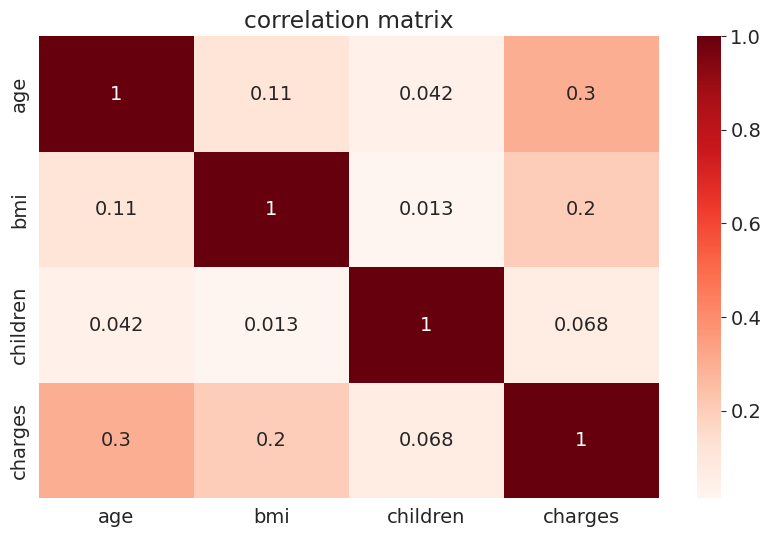

In [233]:
sns.heatmap(medical_df.corr(numeric_only=True),cmap="Reds", annot =True)
plt.title("correlation matrix")
plt.plot()

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

# Linear Regression Using Single Feature

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, create a data frame containing just the data for non-smokers.

In [234]:
non_smoker_df = medical_df[medical_df.smoker == "no"]

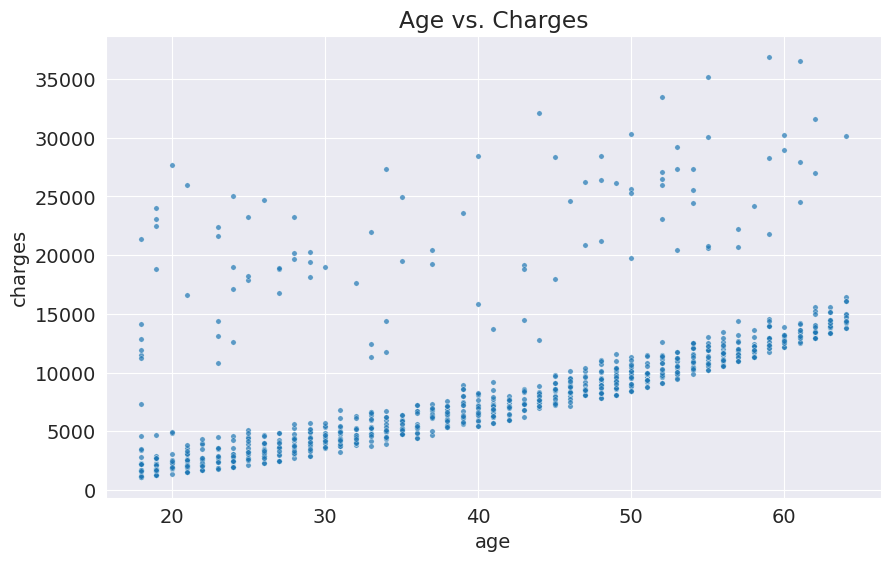

In [235]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

we see that apart from few wxceptions the points tend to form a line. We will try and **fit** a line for these points and use this line to predict the chages for other ages as well


### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data.

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line.

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets".



In [236]:
def estimate_charges(age, w, b):
  return w * age + b

In [237]:
w = 50
b= 100

In [238]:
estimate_charges(30 , w, b)

1600

In [239]:
ages = non_smoker_df.age

In [240]:
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [241]:
estimated_charges = estimate_charges(ages , w , b)


In [242]:
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [243]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


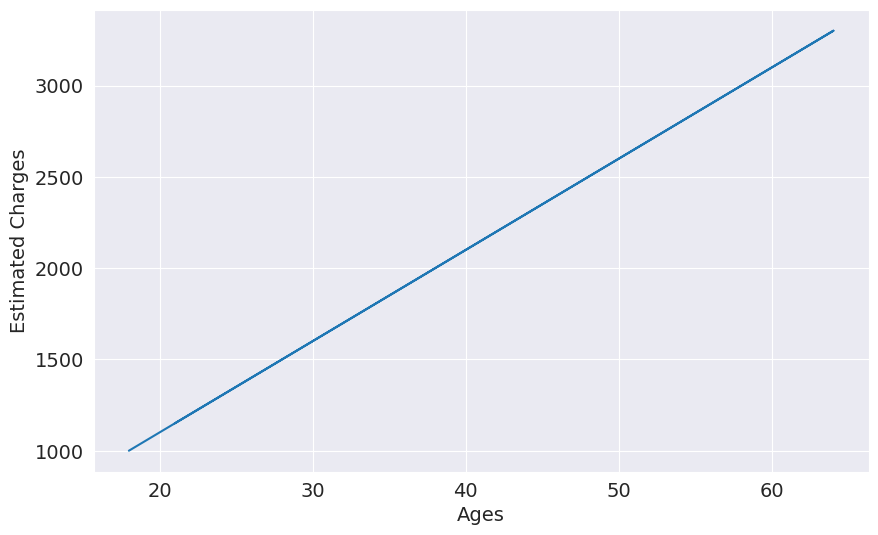

In [244]:
plt.plot(ages, estimated_charges);
plt.xlabel('Ages');
plt.ylabel('Estimated Charges');

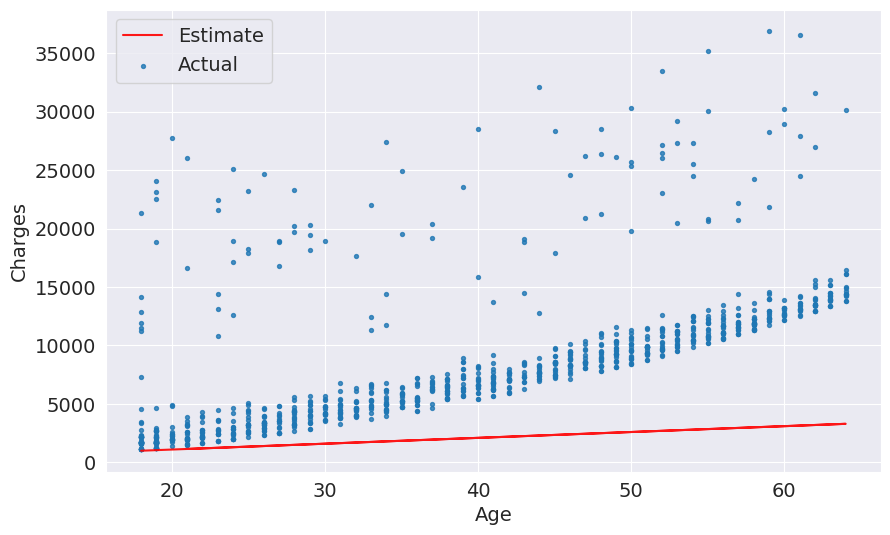

In [245]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [246]:
def try_parameter(w, b):
  target = non_smoker_df.charges
  ages = non_smoker_df.age

  estimated_charges = estimate_charges(ages,w,b)

  plt.plot(ages, estimated_charges ,'r', alpha = 0.8)
  plt.scatter(ages,target,s = 8 , alpha = 0.8)
  plt.xlabel("ages")
  plt.ylabel("charges")
  plt.legend(["estimate","actual"])


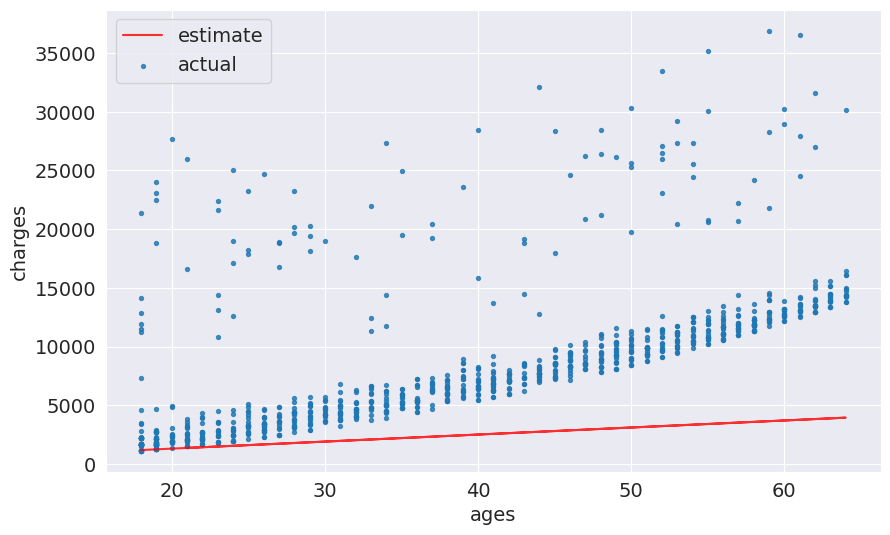

In [247]:
try_parameter(60,100)

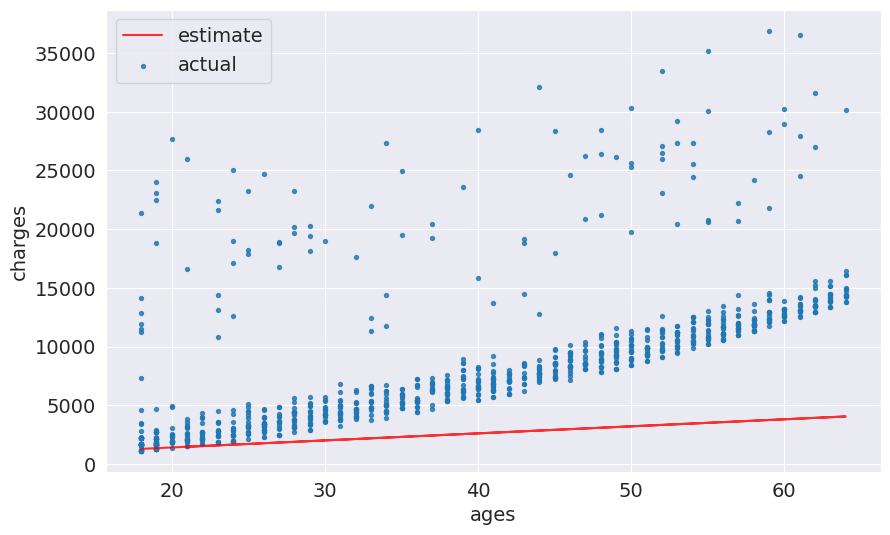

In [248]:
try_parameter(60,200)

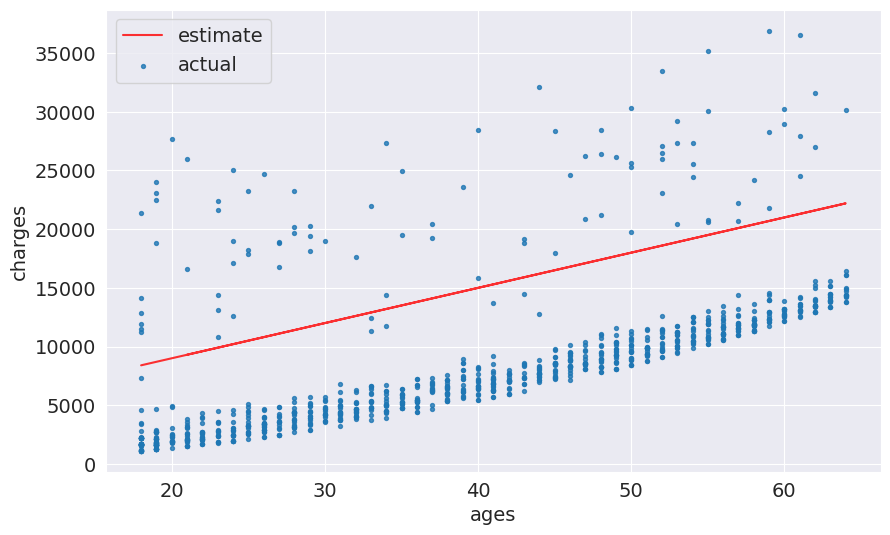

In [249]:
try_parameter(300,3000)

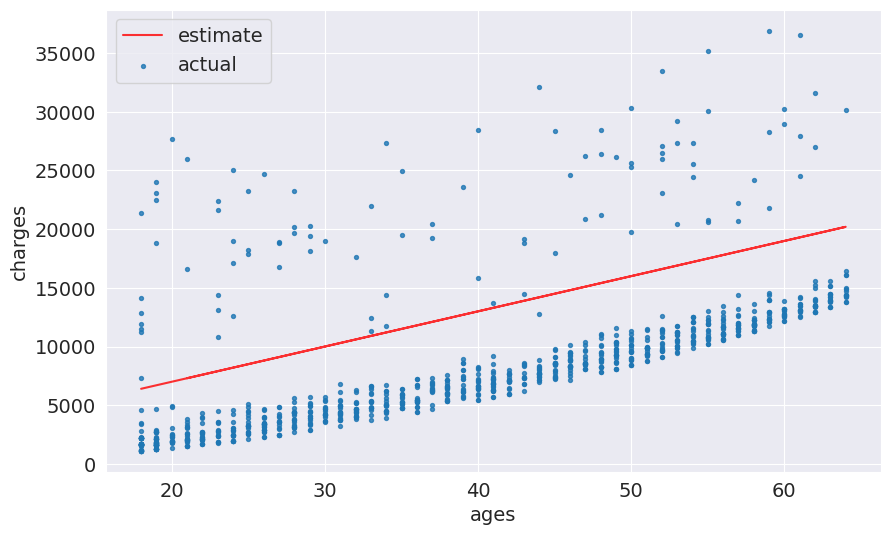

In [250]:
try_parameter(300,1000)

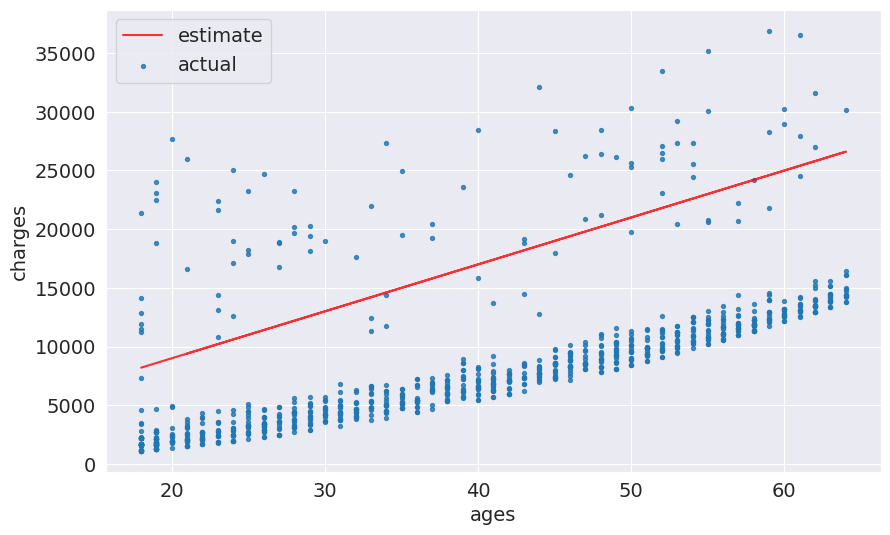

In [251]:
try_parameter(400,1000)

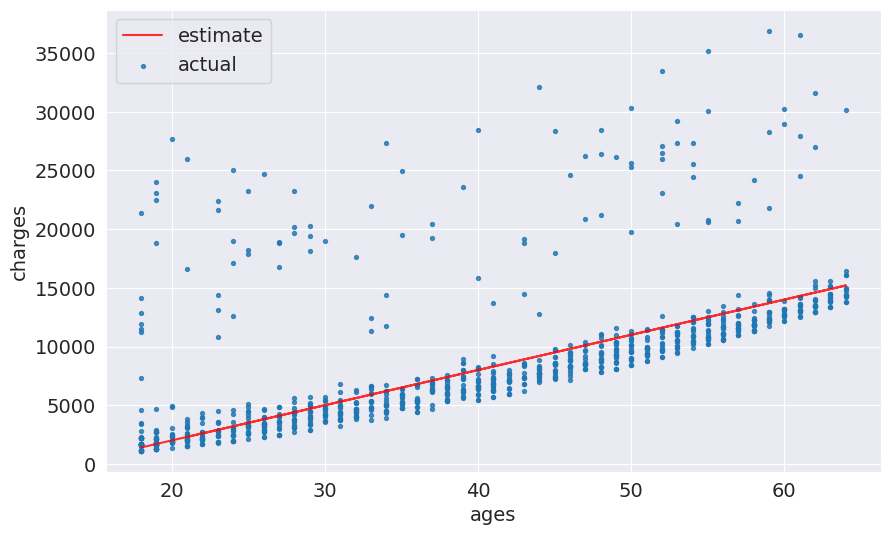

In [252]:
try_parameter(300, - 4000)

In [253]:
!pip install numpy --quiet

In [254]:
import numpy as np

In [255]:
def rmse(target , predictions):
  return np.sqrt(np.mean(np.square(target - predictions)))

In [256]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [257]:
rmse(targets, predicted)

np.float64(8461.949562575493)

On average, each element in the prediction differs from the actual target by \$8461.

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.


In [258]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


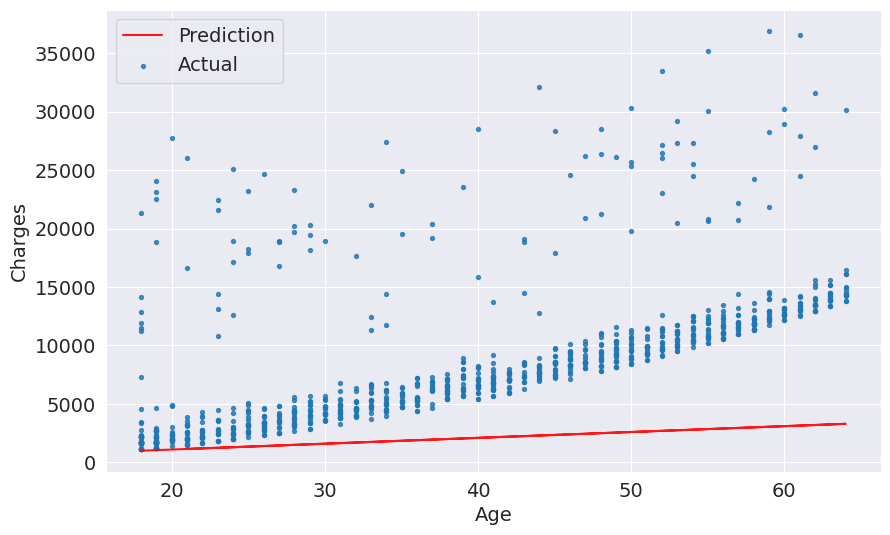

In [259]:
try_parameters(50,100)

RMSE Loss:  4725.9133994520325


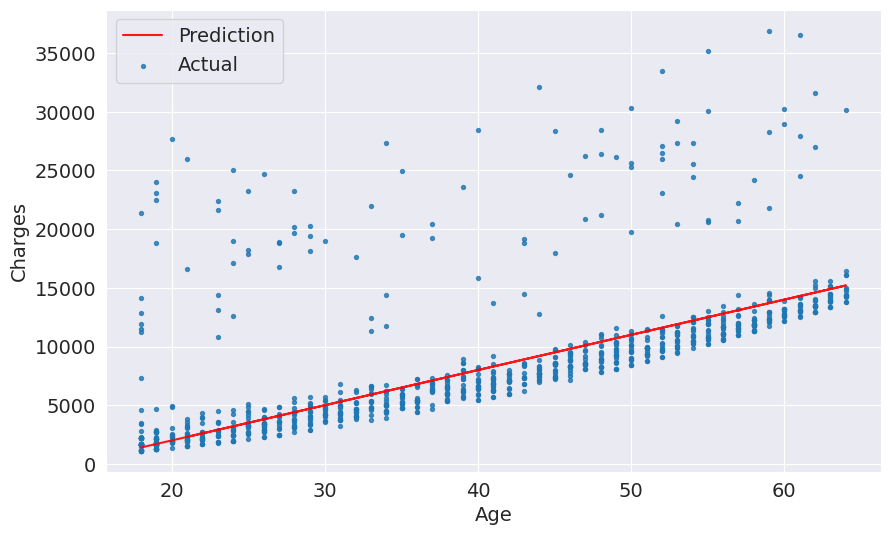

In [260]:
try_parameters(300,-4000)

# Linear Regression Using Scilit Learn

In [261]:
pip install scikit-learn --quiet

In [262]:
from sklearn.linear_model import LinearRegression

In [263]:
model = LinearRegression()

Note that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [264]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [265]:
model.fit(inputs,targets)

LinearRegression()

In [266]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [267]:
predictions = model.predict(inputs)

In [268]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [269]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [270]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [271]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [272]:
# w
model.coef_

array([267.24891283])

In [273]:
#b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.505766636395


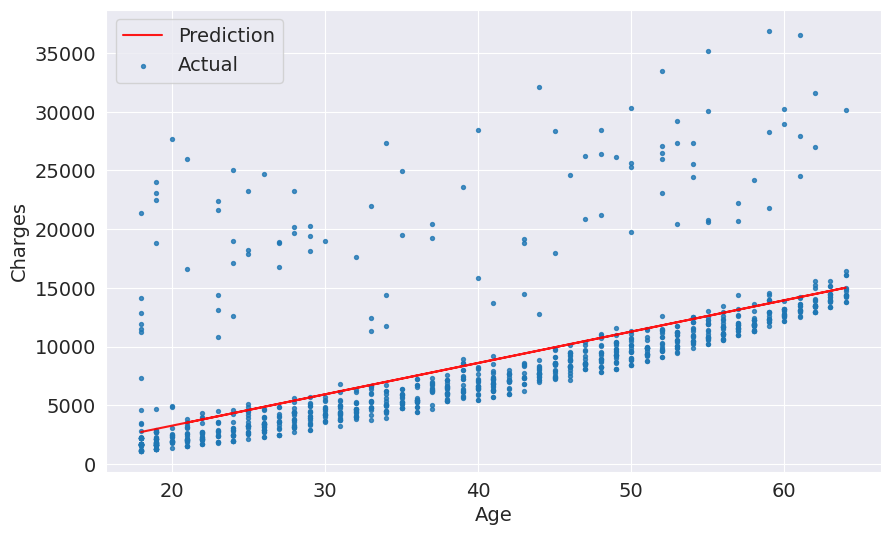

In [274]:
try_parameters(model.coef_, model.intercept_)

In [275]:
from sklearn.linear_model import SGDRegressor

In [276]:
model = SGDRegressor(max_iter=100, learning_rate="constant", eta0=0.01)

In [277]:
model.fit(inputs,targets)

SGDRegressor(learning_rate='constant', max_iter=100)

In [278]:
predictionsSGD = model.predict(inputs)

In [279]:
predictionsSGD

array([-1.88112678e+12, -2.90356892e+12, -3.41479000e+12, ...,
       -1.88112678e+12, -1.88112678e+12, -2.18785942e+12])

In [280]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [281]:
rmse(targets , predictionsSGD )

np.float64(4314777810052.923)

# Linear Regression using Multiple Features


$charges = w_1 \times age + w_2 \times bmi + b$

In [282]:
inputs = non_smoker_df[['age','bmi']]
targets = non_smoker_df.charges

In [283]:
model = LinearRegression()

In [284]:
model.fit(inputs,targets)

LinearRegression()

In [285]:
model.predict(inputs)

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

In [286]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [287]:
rmse(targets , model.predict(inputs))

np.float64(4662.3128354612945)

Adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [288]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

Clearly, BMI has a much lower weightage, and you can see why. It has a tiny contribution, and even that is probably accidental. This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply.



---

Adding the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + b$

In [289]:

inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']


model = LinearRegression().fit(inputs, targets)


model.predict(inputs)


loss = rmse(targets, model.predict(inputs))
print('Loss:', loss)

Loss: 4608.470405038247


In [290]:

inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']


model = LinearRegression().fit(inputs, targets)

model.predict(inputs)


loss = rmse(targets, model.predict(inputs))
print('Loss:', loss)

Loss: 11355.317901125973


## Using Categorical Features for Machine Learning


To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.

2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.

3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



# Binary Categories

In [291]:
smoker_codes= {'yes' :1 ,'no': 0}
medical_df['smoker_codes']= medical_df.smoker.map(smoker_codes)

In [292]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [293]:
inputs = medical_df[['age','bmi','children','smoker_codes']]
targets = medical_df.charges

model = LinearRegression()

model.fit(inputs , targets)

model.predict(inputs)

rmse(targets,model.predict(inputs))

np.float64(6056.439217188081)

The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


 adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + b$

In [294]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_codes']= medical_df.sex.map(sex_codes)

In [295]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [296]:
inputs = medical_df[['age','bmi','children','smoker_codes','sex_codes']]
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)

model.predict(inputs)


loss = rmse(targets, model.predict(inputs))
print('Loss:', loss)

Loss: 6056.100708754546


One Hot Encoding

In [297]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

OneHotEncoder() creates an encoder that converts categorical values into one-hot encoded format.

The fit() method analyzes the unique values in the 'region' column.
It learns the categories present in 'region'.



In [298]:
encoded_array = enc.transform(medical_df[['region']]).toarray()
print(encoded_array)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [299]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = encoded_array

In [300]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [301]:
input_cols = ['age', 'bmi', 'children', 'smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)


loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [303]:
medical_df[input_cols].loc[10]


,10
age,25.00
bmi,26.22
children,0.00
smoker_codes,0.00
sex_codes,1.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


In [307]:
model.predict([[28 , 30 , 1, 1, 1, 0 ,1 ,0 , 0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29268.99973145])

# Feature Scaling

To compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [308]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [309]:
model.intercept_

np.float64(-12525.547811195444)

In [310]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_codes,23848.534542
4,sex_codes,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811



Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [311]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [313]:
numerical_cols = ['age','bmi','children']
scaler.fit(medical_df[numerical_cols])

StandardScaler()

In [315]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [316]:
 scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [317]:
scaled_inputs = scaler.transform(medical_df[numerical_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [319]:
cat_cols = ['smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values #converts to array

In [322]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)


predictions = model.predict(inputs)


loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [323]:
from sklearn.model_selection import train_test_split

In [336]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1,random_state = 1)

In [337]:

model = LinearRegression().fit(inputs_train, targets_train)

predictions_test = model.predict(inputs_test)

loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6565.384612114563


In [338]:

predictions_train = model.predict(inputs_train)


loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 5982.413714274995
